In [ ]:
import graphviz
import random

graphviz.__version__

# Documentation:
# https://graphviz.org/

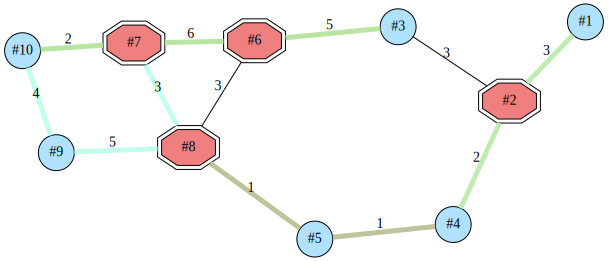

In [2]:
g = graphviz.Graph('Buses lines', filename='buses_lines.gv', engine='sfdp')

# colors:
# https://graphviz.org/doc/info/colors.html

# creates random colors for edges
NUM_OF_LINES = 4
r = lambda: random.randint(150, 255)
colors = ['#%02X%02X%02X' % (r(),r(),r()) for line in range(NUM_OF_LINES)]
# print(colors)

# adds transfer stations
g.attr('node', shape='doubleoctagon', style='filled', fillcolor='lightcoral', fixedsize='true')
g.node('#2')
g.node('#6')
g.node('#7')
g.node('#8')


# adds unattended line segments
g.attr('node', shape='circle', style='filled', fillcolor='lightskyblue1')
g.attr('edge', penwidth='1')
g.edge('#2', '#3', label='3')
g.edge('#6', '#8', label='3')

# adds attended line segments
g.attr('edge', penwidth='5', fontcolor='black')
g.edge('#1', '#2', label='3', color=colors[0])
g.edge('#2', '#4', label='2', color=colors[0])
g.edge('#4', '#5', label='1', color=colors[1])
g.edge('#5', '#8', label='1', color=colors[1])
g.edge('#3', '#6', label='5', color=colors[2])
g.edge('#6', '#7', label='6', color=colors[2])
g.edge('#7', '#10', label='2', color=colors[2])
g.edge('#7', '#8', label='3', color=colors[3])
g.edge('#8', '#9', label='5', color=colors[3])
g.edge('#9', '#10', label='4', color=colors[3])

g

# creates pdf file
# g.view()

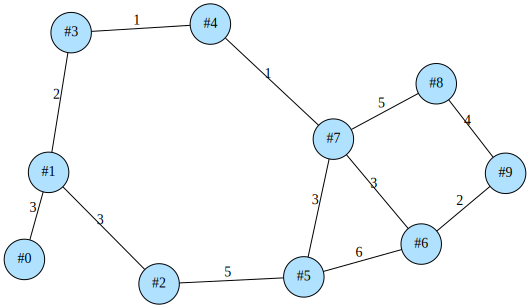

In [1]:
from base_structure import Graph
from initial_solution import CreateSolution
from json_parser import Parser
from visualization import GraphVisualizer

_parser = Parser("../utils/graphs/g1.json")
interchange_points = _parser.get_interchange_points()
size = _parser.get_size()
edges = _parser.get_edges()
graph = Graph(size)
# print(size, edges)
g = GraphVisualizer(size, edges)
g.show()

In [3]:
# g.save('example_saved_graph')